Name: Farid Hossain, Student id: 23006446

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset

In [ ]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

# Data Cleaning

In [ ]:
# Drop the 'Id' column as it is not needed for the analysis
df = df.drop(['Id'], axis=1)
# Encode the 'Species' column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Perform k-means clustering

In [ ]:
n_init=100
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(df.iloc[:, :-1])
# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

In [ ]:
# Plot a barplot of the 'Species' column

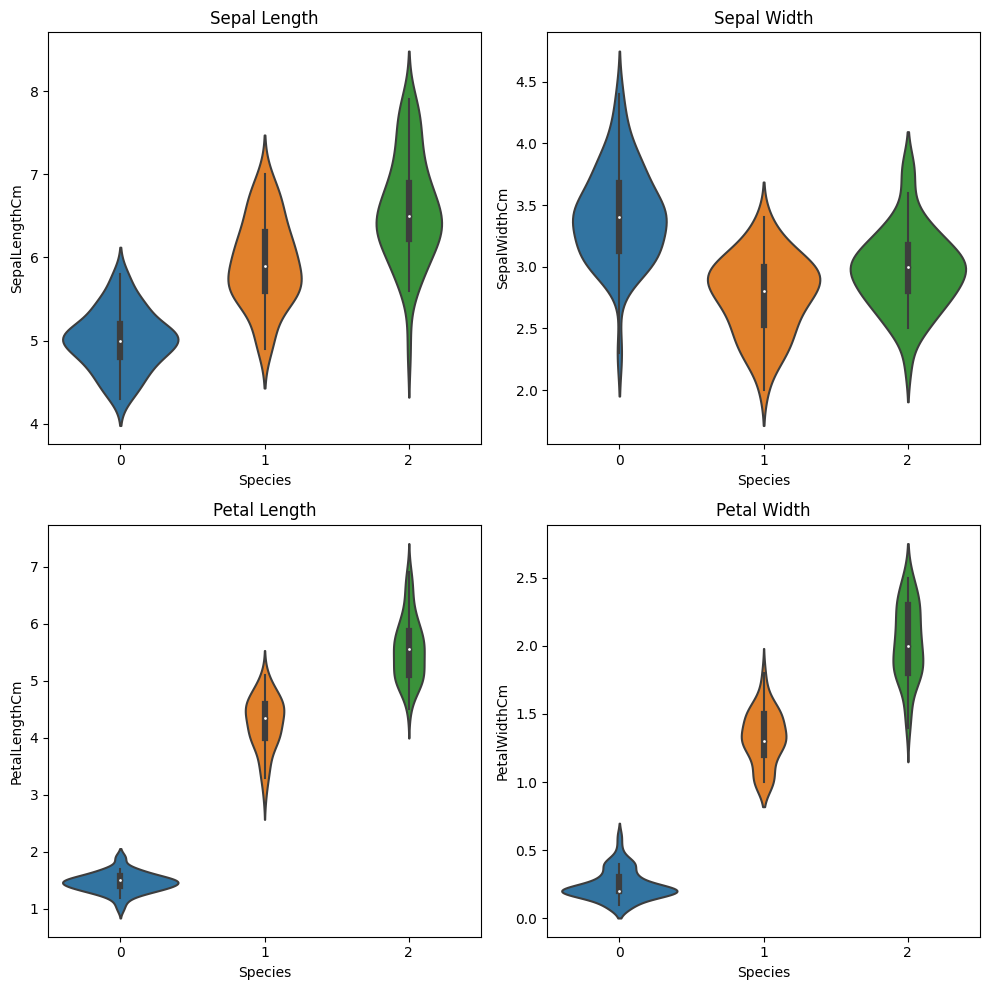

In [ ]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create violin plots
sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=axs[0, 0])
sns.violinplot(x='Species', y='SepalWidthCm', data=df, ax=axs[0, 1])
sns.violinplot(x='Species', y='PetalLengthCm', data=df, ax=axs[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=df, ax=axs[1, 1])

# Set plot titles
axs[0, 0].set_title('Sepal Length')
axs[0, 1].set_title('Sepal Width')
axs[1, 0].set_title('Petal Length')
axs[1, 1].set_title('Petal Width')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Plot a scatter plot of 'SepalLengthCm' vs 'SepalWidthCm'

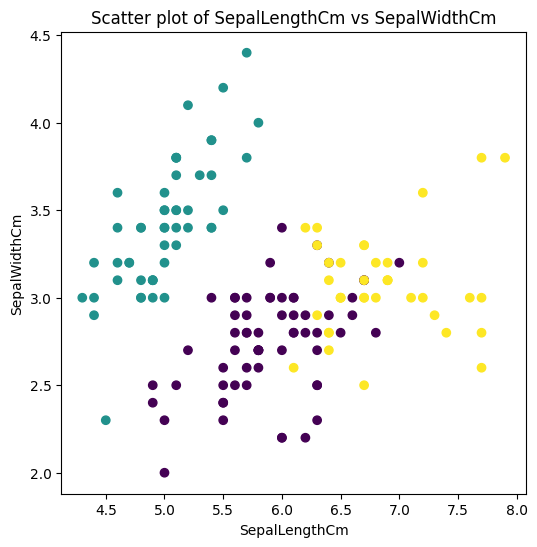

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Cluster'])
plt.title('Scatter plot of SepalLengthCm vs SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [ ]:
# Plot a confusion matrix

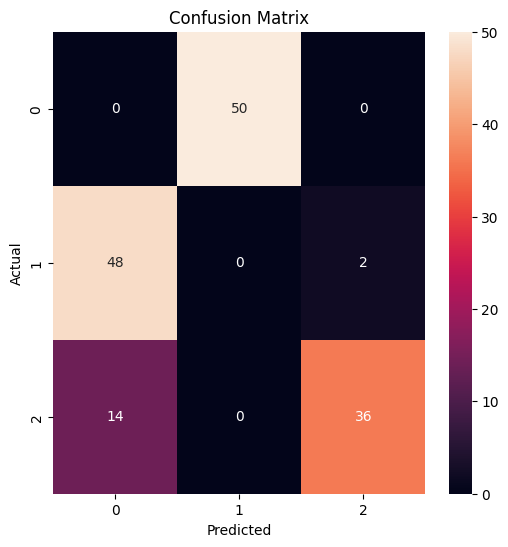

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(df['Species'], df['Cluster']), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# silhouette score and plot

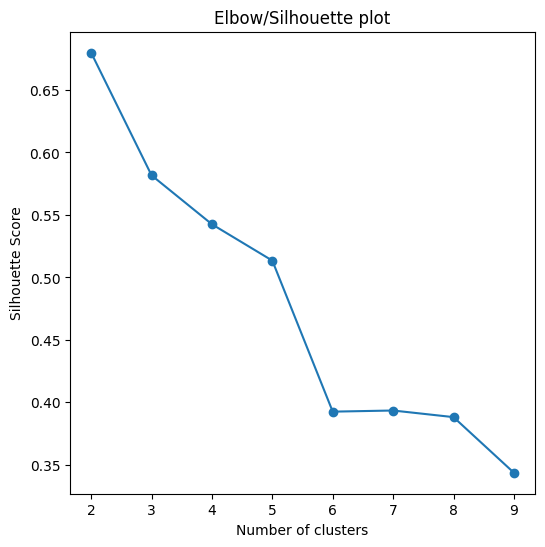

In [ ]:
# Calculate the silhouette score and plot the silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(df.iloc[:, :-1])
    silhouette_scores.append(silhouette_score(df.iloc[:, :-1], kmeans.labels_))

plt.figure(figsize=(6, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Elbow/Silhouette plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Perform line fitting

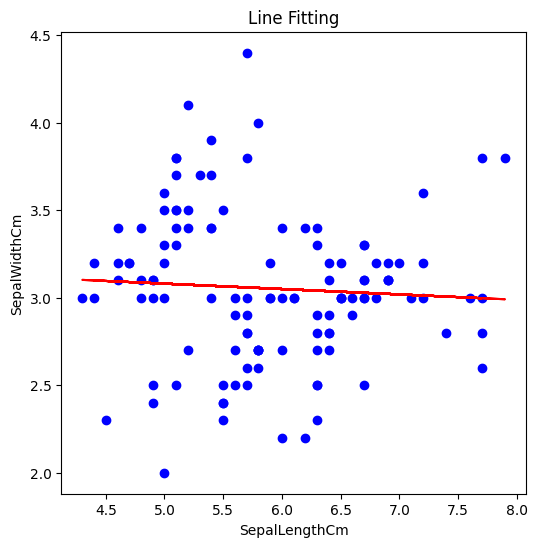

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm']], df['SepalWidthCm'], test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Plot the line fitting result

plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Line Fitting')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()